In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Model
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

#Time
import time

In [2]:
#from google.colab import files

In [3]:
#uploaded = files.upload()

In [4]:
df = pd.read_csv(r"C:\Users\santi\OneDrive\Documentos\Santi Documentos\Facultad UTN\5° Año\Ciencia de datos\pd_speech_features.csv",delimiter=',')
 

In [5]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [6]:
df.shape

(756, 755)

In [7]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [9]:
df = df.drop('id', 1)

In [10]:
df.shape

(756, 754)

In [11]:
X = df.iloc[:, 0:753]  # Selecciono las variables independientes
y = df.iloc[:, 753]    # Selecciono la variable objetivo

In [12]:
y.value_counts()

1    564
0    192
Name: class, dtype: int64

In [13]:
X = X.values
y = y.values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
sc = StandardScaler()
X_train_scal = sc.fit_transform(X_train)
X_test_scal = sc.transform(X_test)

Wall time: 0 ns


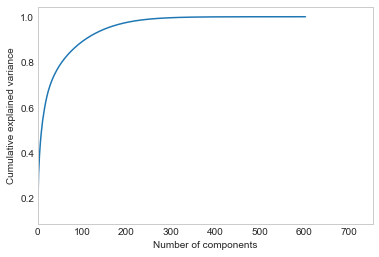

In [16]:
pca = PCA().fit(X_train_scal)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,754,1)
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
%time

In [17]:
pca=PCA(0.95) #Se puede setear el parametro n_components para quedarse solo con n cantidad de variables
X_train_scal = pca.fit_transform(X_train_scal)
X_test_scal = pca.transform(X_test_scal)

In [18]:
pca.n_components_

157

## Probamos algunos algoritmos aplicando PCA


### LogisticRegression




In [19]:
%%time
param_lr = {'C':[1, 10, 100, 1000], "penalty": ("l1", "l2"), "solver":("lbfgs", "liblinear")}
lr = LogisticRegression()
clf_lr = GridSearchCV(lr, param_grid = param_lr , scoring= 'roc_auc', refit = True, cv = 5)
clf_lr.fit(X_train_scal, y_train.ravel())


C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  FitFailedWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  FitFailedWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFaile

Wall time: 4.56 s


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ('l1', 'l2'),
                         'solver': ('lbfgs', 'liblinear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [20]:
scores = clf_lr.cv_results_

In [21]:
print("Los mejores paramentros son %s con un score de %0.2f" % (clf_lr.best_params_, clf_lr.best_score_))

Los mejores paramentros son {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'} con un score de 0.83


## KNN

In [22]:
%%time
neigh = KNeighborsClassifier()
param_neigh = {'n_neighbors':[1, 10, 100, 200]}
clf_n = GridSearchCV(neigh, param_grid = param_neigh , scoring= 'roc_auc', refit = True, cv = 5)
clf_n.fit(X_train_scal, y_train.ravel())


Wall time: 616 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 10, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [23]:
scores = clf_n.cv_results_
print("Los mejores paramentros son %s con un score de %0.2f" % (clf_n.best_params_, clf_n.best_score_))

Los mejores paramentros son {'n_neighbors': 10} con un score de 0.89


## SVM

In [24]:
param_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}

In [25]:
svc = svm.SVC()

In [26]:
clf_svm = GridSearchCV(svc, param_grid = param_svc, scoring= 'roc_auc', refit = True, cv = 5)

In [27]:
%%time
clf_svm.fit(X_train_scal, y_train.ravel())


Wall time: 15.3 s


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [28]:
scores = clf_svm.cv_results_

In [29]:
print("Los mejores paramentros son %s con un score de %0.2f" % (clf_svm.best_params_, clf_svm.best_score_))

Los mejores paramentros son {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} con un score de 0.92


## RandomForest

In [30]:
rf= RandomForestClassifier(class_weight="balanced")

In [31]:
param_trees = {'n_estimators': [50, 100, 200], 
               'max_features': [30,50 ,80 ], 
               'max_depth': [5, 20, 50, 70], 
               'min_samples_leaf':[ 5, 8, 10]}

In [32]:
%%time
clf_rf = GridSearchCV(rf, param_grid = param_trees, scoring= 'roc_auc', refit = True, cv = 5)
clf_rf.fit(X_train_scal, y_train.ravel())

Wall time: 6min 34s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [33]:
scores = clf_rf.cv_results_

In [34]:
print("Los mejores paramentros son %s con un score de %0.2f" % (clf_rf.best_params_, clf_rf.best_score_))

Los mejores paramentros son {'max_depth': 20, 'max_features': 80, 'min_samples_leaf': 5, 'n_estimators': 200} con un score de 0.87


### Probamos los mismos algoritmos sin PCA

In [35]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
X_train_scal2 = sc.fit_transform(X_train2)
X_test_scal2 = sc.transform(X_test2)

## LogisticRegression

In [37]:
%%time
param_lr = {'C':[1, 10, 100, 1000], "penalty": ("l1", "l2"), "solver":("lbfgs", "liblinear")}
lr = LogisticRegression()
clf_lr2 = GridSearchCV(lr, param_grid = param_lr , scoring= 'roc_auc', refit = True, cv = 5)
clf_lr2.fit(X_train_scal2, y_train2.ravel())


C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  FitFailedWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  FitFailedWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFaile

Wall time: 7.19 s


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ('l1', 'l2'),
                         'solver': ('lbfgs', 'liblinear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [38]:
scores2 = clf_lr2.cv_results_

In [39]:
print("Los mejores paramentros son %s con un score de %0.2f" % (clf_lr2.best_params_, clf_lr2.best_score_))

Los mejores paramentros son {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'} con un score de 0.86


## KNN

In [40]:
%%time
neigh = KNeighborsClassifier()
param_neigh = {'n_neighbors':[1, 10, 100, 200]}
clf_n2 = GridSearchCV(neigh, param_grid = param_neigh , scoring= 'roc_auc', refit = True, cv = 5)
clf_n2.fit(X_train_scal2, y_train2.ravel())



Wall time: 2.55 s


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 10, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [41]:
scores2 = clf_n2.cv_results_

In [42]:
print("Los mejores paramentros son %s con un score de %0.2f" % (clf_n2.best_params_, clf_n2.best_score_))

Los mejores paramentros son {'n_neighbors': 10} con un score de 0.89


## SVM

In [43]:
param_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
svc = svm.SVC()

In [44]:
%%time
clf_svm2 = GridSearchCV(svc, param_grid = param_svc, scoring= 'roc_auc', refit = True, cv = 5)
clf_svm2.fit(X_train_scal2, y_train2.ravel())


Wall time: 53.3 s


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [45]:
scores2 = clf_svm2.cv_results_

In [46]:
print("Los mejores paramentros son %s con un score de %0.2f" % (clf_svm2.best_params_, clf_svm2.best_score_))

Los mejores paramentros son {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'} con un score de 0.92


## RandomForest

In [47]:
rf= RandomForestClassifier(class_weight="balanced")
param_trees = {'n_estimators': [50, 100, 200], 
               'max_features': [30, 50, 80], 
               'max_depth': [5, 20, 50, 70], 
               'min_samples_leaf':[ 5, 8, 10]}

In [48]:
%%time
clf_rf2 = GridSearchCV(rf, param_grid = param_trees, scoring= 'roc_auc', refit = True, cv = 5)
clf_rf2.fit(X_train_scal2, y_train2.ravel())


Wall time: 6min 22s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [49]:
scores2 = clf_rf2.cv_results_

In [50]:
print("Los mejores paramentros son %s con un score de %0.2f" % (clf_rf2.best_params_, clf_rf2.best_score_))

Los mejores paramentros son {'max_depth': 70, 'max_features': 80, 'min_samples_leaf': 5, 'n_estimators': 100} con un score de 0.93
